<a href="https://colab.research.google.com/github/BigM66/MLA_MLP/blob/main/Classification_In_class_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Titanic Survival Prediction: Model Selection and Hyperparameter Tuning

In this notebook, you will:
1. Load the Titanic dataset from an online source.
2. Perform basic EDA to understand the data.
3. Use pipelines to preprocess numerical and categorical data.
4. Train and evaluate multiple classification models (KNN, SVC, Random Forest, Decision Tree, Logistic Regression, Bagging, and Boosting).
5. Conduct hyperparameter tuning to find the best model.
6. Write reflection on the findings

---

## 1. Importing Libraries
**Task**: Import the necessary libraries for data handling, visualization, model training, and evaluation.

In [ ]:
# import libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import load_iris
from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer


## 2. Load the titanic dataset from seaborn

In [ ]:
titanic = sns.load_dataset('titanic')



## 3. Basic EDA (Exploratory Data Analysis)
Question 1: What is the shape of the dataset?

In [ ]:
titanic.shape

(891, 15)

Question 2: Are there any missing values?

In [ ]:
titanic.isnull().sum()

,0
survived,0
pclass,0
sex,0
age,177
sibsp,0
parch,0
fare,0
embarked,2
class,0
who,0


Question 3: Visualize some relationships (atleast 3). such as:

- The distribution of numerical features like age and fare.
- The survival rate by different classes, gender, etc.

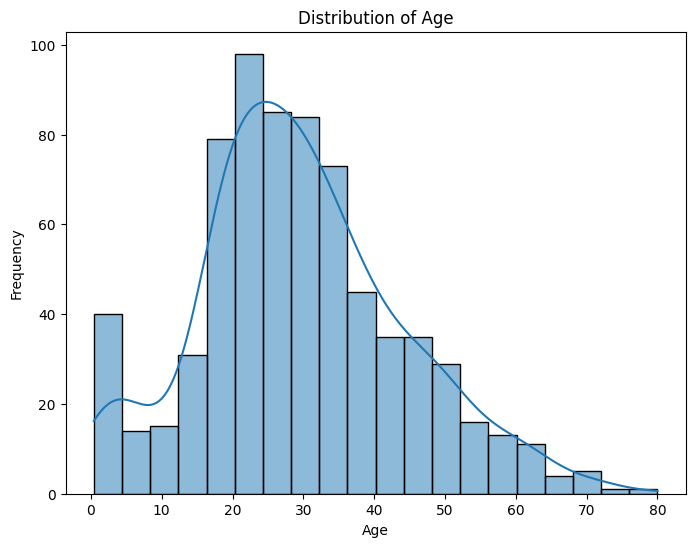

In [ ]:

# Visualize the distribution of 'Age'
plt.figure(figsize=(8, 6))
sns.histplot(titanic['age'].dropna(), kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()



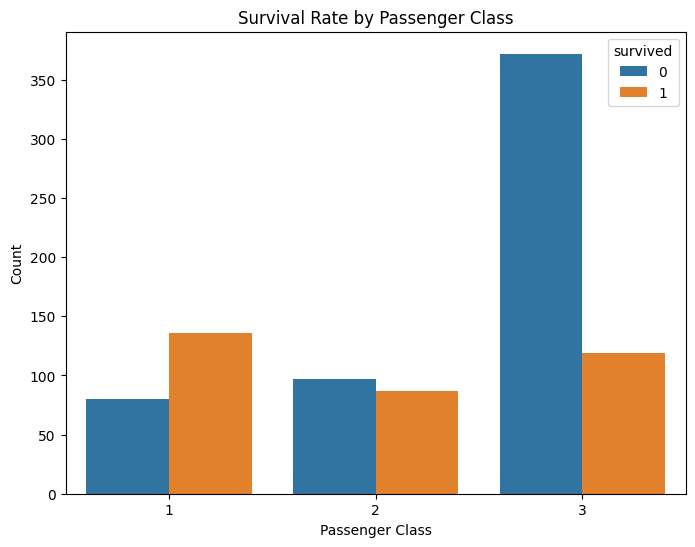

In [ ]:
# Visualize the survival rate by 'Pclass'
plt.figure(figsize=(8, 6))
sns.countplot(x='pclass', hue='survived', data=titanic)
plt.title('Survival Rate by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Count')
plt.show()

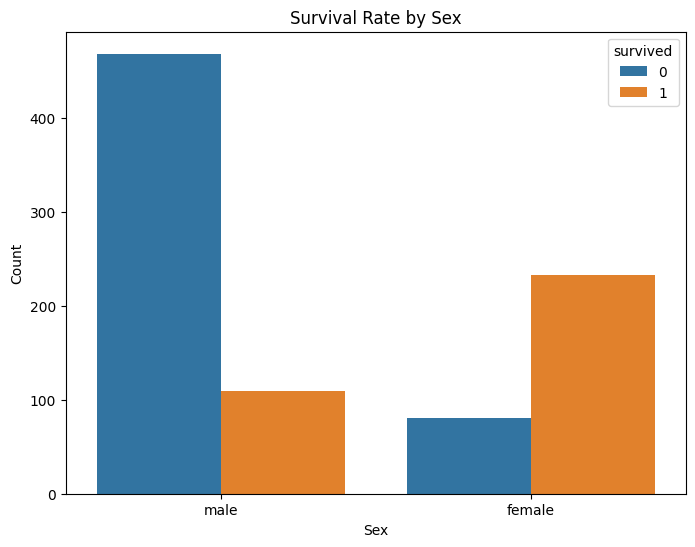

In [ ]:
# Visualize the survival rate by 'Sex'
plt.figure(figsize=(8, 6))
sns.countplot(x='sex', hue='survived', data=titanic)
plt.title('Survival Rate by Sex')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.show()

In [ ]:
# Split the data into features and target
X = titanic[['age', 'fare', 'pclass', 'sex', 'embarked', 'who', 'alone']]
y = titanic['survived']




### Split the data into training and testing sets

In [ ]:
# split into training and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## 4. Data Preprocessing with Pipelines
Task: Create a data preprocessing pipeline for numerical and categorical features.

- Numerical features: Use StandardScaler to scale them.
- Categorical features: Use OneHotEncoder to encode them.
- impute missing values

In [ ]:

# Impute missing values
X_train['age'] = X_train['age'].fillna(X_train['age'].median())
X_train['embarked'] = X_train['embarked'].fillna(X_train['embarked'].mode()[0])
X_test['age'] = X_test['age'].fillna(X_test['age'].median())
X_test['embarked'] = X_test['embarked'].fillna(X_test['embarked'].mode()[0])


# Create pipelines for numerical and categorical features
numerical_features = ['age', 'fare']
categorical_features = ['pclass', 'sex', 'embarked', 'who', 'alone']

numerical_transformer = Pipeline(steps=[('scaler', StandardScaler())])
categorical_transformer = Pipeline(steps=[('onehot', OneHotEncoder(handle_unknown='ignore'))])


# Combine transformers using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Fit and transform the training data
X_train_processed = preprocessor.fit_transform(X_train)

# Transform the testing data
X_test_processed = preprocessor.transform(X_test)

## Training data with multiple models

In [ ]:
# Define models
models = {
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Support Vector Machine': SVC(),
    'Bagging Classifier': BaggingClassifier(),
    'Gradient Boosting': GradientBoostingClassifier()
}



# Evaluate each model
for model_name, model in models.items():
    # Create pipeline with preprocessor and model
    pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', model)])

    # Train the model
    pipeline.fit(X_train, y_train)

    # Make predictions
    y_pred = pipeline.predict(X_test)

    # Print accuracy and classification report
    print(f"\nModel: {model_name}")
    print("Accuracy:", accuracy_score(y_test, y_pred))




Model: K-Nearest Neighbors
Accuracy: 0.8156424581005587

Model: Logistic Regression
Accuracy: 0.7932960893854749

Model: Decision Tree
Accuracy: 0.7541899441340782

Model: Random Forest
Accuracy: 0.7932960893854749

Model: Support Vector Machine
Accuracy: 0.8044692737430168

Model: Bagging Classifier
Accuracy: 0.7932960893854749

Model: Gradient Boosting
Accuracy: 0.8100558659217877


#Hyperparameter Tuning
## Define parameter grids for the top 2 models
Example:
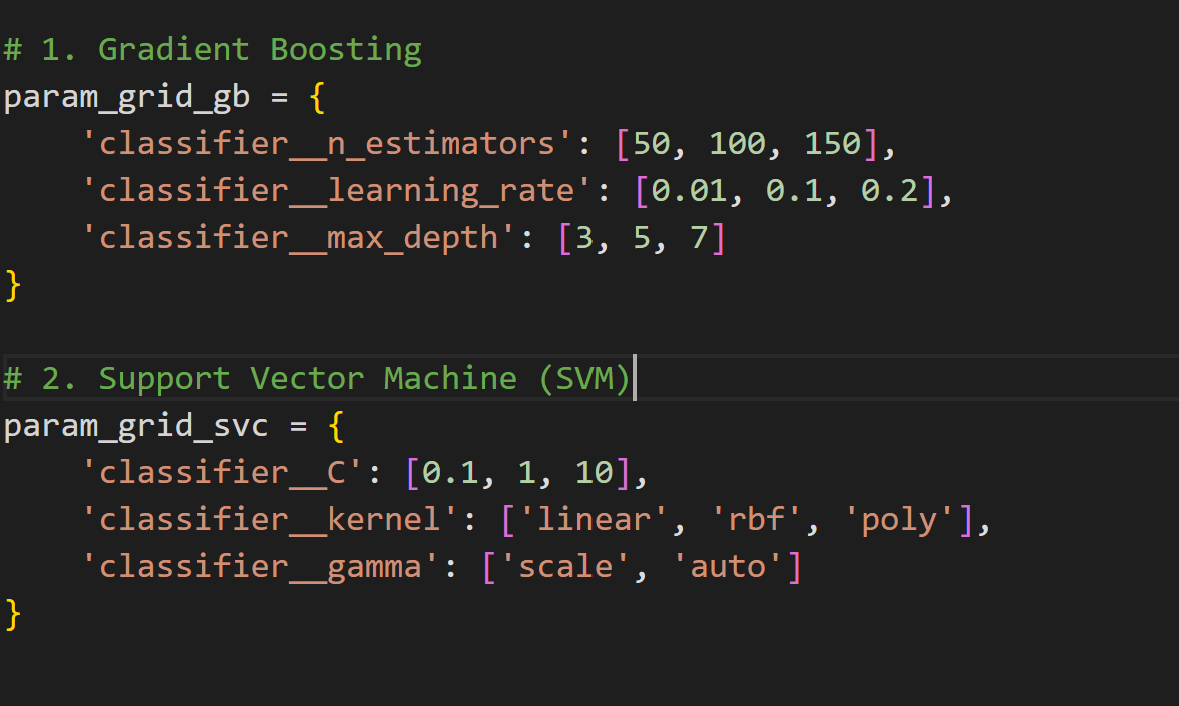

In [ ]:

# Define parameter grids for the top 2 models
param_grid_KNN = {
    'classifier__n_neighbors': [3, 5, 7],
    'classifier__weights': ['uniform', 'distance']
}

param_grid_gb = {
    'classifier__n_estimators': [50, 100, 200],
    'classifier__learning_rate': [0.01, 0.1, 1],
    'classifier__max_depth': [3, 5, 7]
}

## List of models and their corresponding parameter grids
Example
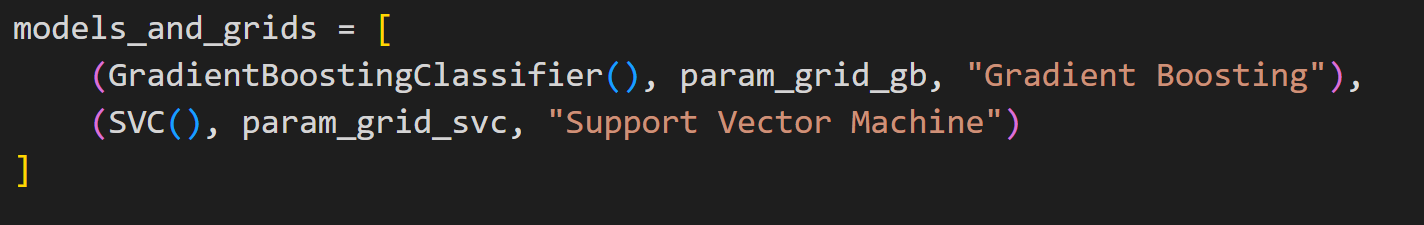

In [ ]:
# List of models and their corresponding parameter grids

models_and_grids = [
    (GradientBoostingClassifier(), param_grid_gb, 'Gradient Boosting'),
    (KNeighborsClassifier(), param_grid_KNN, 'K-Nearest Neighbors')
]



In [ ]:
# Loop through each model and perform GridSearchCV
for model, param_grid, model_name in models_and_grids:
    # Create pipeline with preprocessor and model
    pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', model)])

    # Initialize GridSearchCV
    grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

    # Fit the model
    grid_search.fit(X_train, y_train)

    # Output the best parameters and best cross-validation score for each model
    print(f"\nBest parameters for {model_name}: {grid_search.best_params_}")
    print(f"Best cross-validation accuracy for {model_name}: {grid_search.best_score_:.4f}")


Best parameters for Gradient Boosting: {'classifier__learning_rate': 0.01, 'classifier__max_depth': 5, 'classifier__n_estimators': 200}
Best cross-validation accuracy for Gradient Boosting: 0.8244

Best parameters for K-Nearest Neighbors: {'classifier__n_neighbors': 5, 'classifier__weights': 'distance'}
Best cross-validation accuracy for K-Nearest Neighbors: 0.8062


## 7.Reflection and Analysis
Which model performed the best without tuning?

1. Based on the initial accuracy scores, which model had the highest accuracy before hyperparameter tuning?

K nearest neighbor had the highest accuracy of almost 0.82

2. What are two best top performing model? How did hyperparameter tuning affect the top-performing models?

The 2 best performing models were Gradient Boosting and KNN. For gradient boosting the Hyperparameter tuning actual had a slight postive affect on it, raising it from 0.81 to 0.82. On the contrary KNN had a slight decline, going from almost 0.82 down to 0.80

3. Compare the accuracy scores before and after tuning for each of the top-performing models. Which model showed the most improvement?

The gradient boost showed the most improvement with an improvment of 0.81 to 0.82.

4. Summarize the optimal parameters found during hyperparameter tuning. How do these optimal parameters differ from the default ones?

Best parameters for Gradient Boosting: {'classifier__learning_rate': 0.01, 'classifier__max_depth': 5, 'classifier__n_estimators': 200}

all of these numbers are different then the default ones. the max depth and estimators numbers they chose were larger than the default ones, while the learning rate was smaller.

Best parameters for K-Nearest Neighbors: {'classifier__n_neighbors': 5, 'classifier__weights': 'distance'}

The default neighbors value was 5, so that was the same, how ever the weight is changed, as the default weight is uniform and the best one selected was distance


5. Did any model experience overfitting after tuning?
Examine the training versus test accuracy for each of the top models after tuning.
Based on your findings, which model would you select for deployment, and why?

I believe that the KNN showed signs of overfitting after after tuning, as the decrease in values indicates that there may be an issue.


6. Considering both performance (accuracy) and other factors like model complexity and interpretability, which model would you choose as the best candidate for deployment? Explain your reasoning.

I would select the Gradeient boosting for this data set, as it was one of the best models before the tuning, and then after the tuning it became even better. This tells me that it does the best job of sorting through the large data set
Since it combines a bunch of weaker models and strengthens them, that is useful in this situation where the data set is very large.